In [38]:
import pandas as pd
import numpy as np
!pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt




In [39]:
# Reading data
X_train = pd.read_csv('layoffs.csv')
df = X_train.copy()
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lemon,Buenos Aires,Crypto,NaN,0.38,2022-11-24,Series A,Argentina,17.0
1,Assure,Salt Lake City,Finance,NaN,1.00,2022-11-23,Seed,United States,2.0
2,GoodGood,Toronto,Retail,NaN,1.00,2022-11-23,Seed,Canada,6.0
3,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
4,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0


In [40]:
df.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         486
percentage_laid_off    550
date                     0
stage                    4
country                  0
funds_raised           116
dtype: int64

In [41]:
df.total_laid_off = df.total_laid_off.fillna(0)
df.industry = df.industry.fillna(0)
df.stage = df.stage.fillna(0)
df.funds_raised = df.funds_raised.fillna(0)
df.percentage_laid_off = df.percentage_laid_off.fillna(0)


In [42]:
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

<AxesSubplot: xlabel='industry', ylabel='total laid off'>

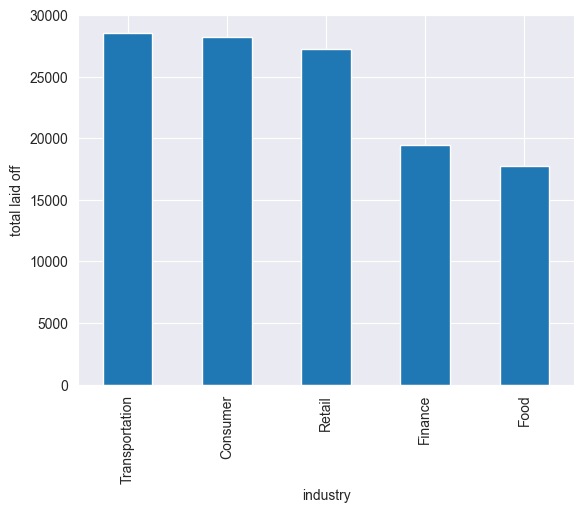

In [43]:
# top 5 total laid off in bar chart by industry
df.head()
df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')

<AxesSubplot: xlabel='company', ylabel='total laid off'>

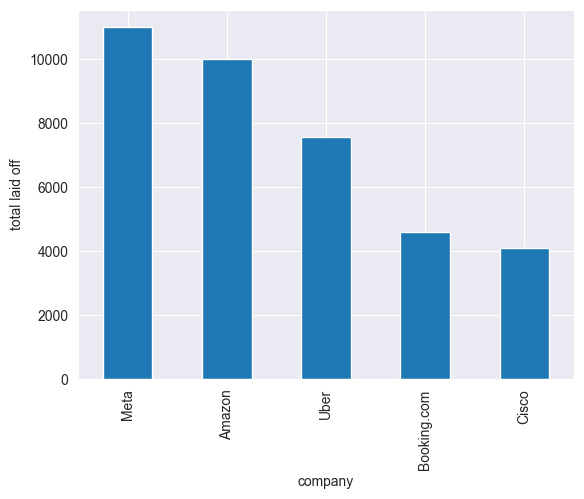

In [44]:
# top 5 total laid off by company
df.head()
df.groupby('company')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')

<AxesSubplot: xlabel='location', ylabel='total laid off'>

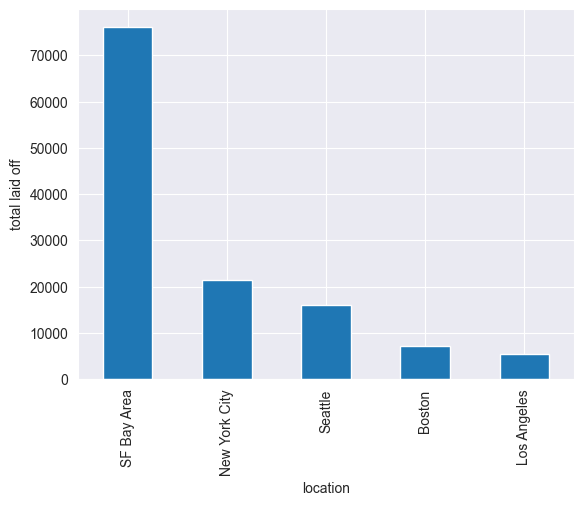

In [45]:
# Top 5 US layoffs by city
df.head()
df[(df['country'] == 'United States')].groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="total laid off", kind='bar')


In [46]:
#nsame exact thing but by rest of world ^
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lemon,Buenos Aires,Crypto,0.0,0.38,2022-11-24,Series A,Argentina,17.0
1,Assure,Salt Lake City,Finance,0.0,1.00,2022-11-23,Seed,United States,2.0
2,GoodGood,Toronto,Retail,0.0,1.00,2022-11-23,Seed,Canada,6.0
3,SIRCLO,Jakarta,Retail,160.0,0.08,2022-11-22,Series B,Indonesia,92.0
4,Trax,Singapore,Retail,80.0,0.08,2022-11-22,Series E,Singapore,1000.0


In [47]:
#layoffs after/during covid
#layoffs now (2022)


In [48]:

## random forest/ logistic regression

## Decision tree
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [49]:
# funds raised to percentage_laid_off
# Linear Regression Machine Learning

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('layoffs.csv')
df_binary = df[['funds_raised', 'total_laid_off']].dropna()
df_binary.head()

,funds_raised,total_laid_off
3,92.0,160.0
4,1000.0,80.0
6,804.0,93.0
8,914.0,100.0
9,1600.0,1500.0


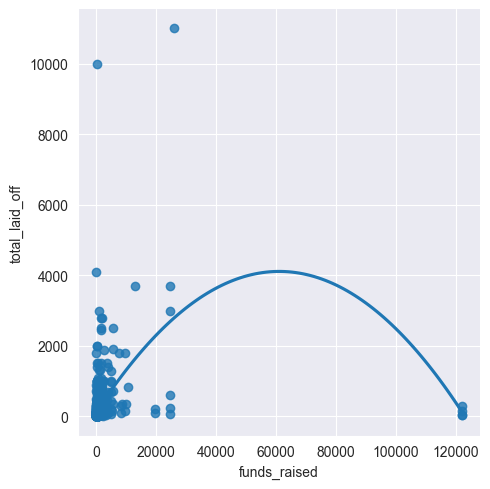

In [50]:
sns.lmplot(x ="funds_raised", y ="total_laid_off", data = df_binary, order = 2, ci = None)


In [51]:
df_binary.fillna(method ='ffill', inplace = True)

In [52]:
X = np.array(df_binary['funds_raised']).reshape(-1, 1)
y = np.array(df_binary['total_laid_off']).reshape(-1, 1)

df_binary.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.042943357436784124


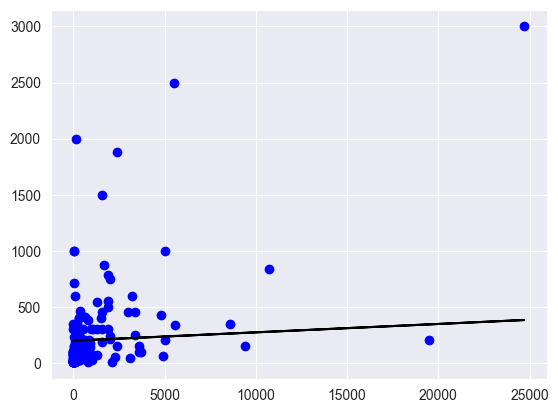

In [53]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

/var/folders/yc/033ng22x3_14htnw_rjy51540000gn/T/ipykernel_8210/2310768153.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.10)
/var/folders/yc/033ng22x3_14htnw_rjy51540000gn/T/ipykernel_8210/2310768153.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.90)
/var/folders/yc/033ng22x3_14htnw_rjy51540000gn/T/ipykernel_8210/2310768153.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 +

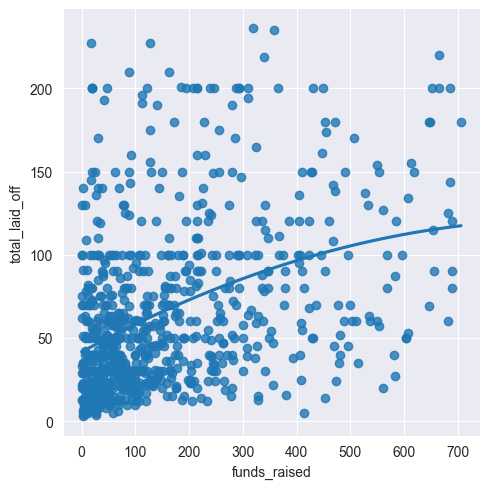

In [60]:
#With Outliers Removed

Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

sns.lmplot(x ="funds_raised", y ="total_laid_off", data = df,
                               order = 2, ci = None)

In [67]:
military = pd.read_csv('military.csv')
netflix = pd.read_csv('netflix.csv')
pd.merge(military, netflix, left_on="Name", right_on="Country")


,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,ARG,Country,Military expenditure (current USD),NaN,NaN,3.051624e+08,2.422198e+08,2.457405e+08,2.524076e+08,...,4.509648e+09,5.459644e+09,4.144992e+09,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Australia,AUS,Country,Military expenditure (current USD),4.597601e+08,4.709601e+08,4.894401e+08,5.532801e+08,6.557601e+08,7.873601e+08,...,2.638295e+10,2.769111e+10,2.671183e+10,Australia,6114,4050,2064,7.84,12.12,16.39
2,Austria,AUT,Country,Military expenditure (current USD),9.155910e+07,9.102985e+07,1.000270e+08,1.259599e+08,1.645947e+08,1.428957e+08,...,2.885947e+09,3.138359e+09,3.367460e+09,Austria,5640,3779,1861,9.03,14.67,20.32
3,Belgium,BEL,Country,Military expenditure (current USD),3.832202e+08,3.912188e+08,4.222208e+08,4.446013e+08,4.970592e+08,5.007221e+08,...,4.314102e+09,4.484653e+09,4.959692e+09,Belgium,4990,3374,1616,10.16,15.24,20.32
4,Bulgaria,BGR,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,7.554065e+08,8.241870e+08,1.095591e+09,Bulgaria,6797,4819,1978,9.03,11.29,13.54
5,Bolivia,BOL,Country,Military expenditure (current USD),NaN,4.935418e+06,5.195619e+06,6.404292e+06,NaN,NaN,...,5.523813e+08,5.740702e+08,6.188421e+08,Bolivia,4991,3155,1836,7.99,10.99,13.99
6,Brazil,BRA,Country,Military expenditure (current USD),3.827298e+08,3.423397e+08,3.874490e+08,4.419996e+08,3.542279e+08,6.328690e+08,...,2.422475e+10,2.928305e+10,2.776643e+10,Brazil,4972,3162,1810,4.61,7.11,9.96
7,Canada,CAN,Country,Military expenditure (current USD),1.702443e+09,1.677821e+09,1.671314e+09,1.610092e+09,1.657457e+09,1.574705e+09,...,1.778278e+10,2.134337e+10,2.162060e+10,Canada,6239,4311,1928,7.91,11.87,15.03
8,Switzerland,CHE,Country,Military expenditure (current USD),2.000938e+08,2.373684e+08,2.737283e+08,2.949954e+08,3.295258e+08,3.434752e+08,...,4.571348e+09,4.628402e+09,4.795847e+09,Switzerland,5506,3654,1852,12.88,20.46,26.96
9,Chile,CHL,Country,Military expenditure (current USD),1.267910e+08,1.609309e+08,1.626262e+08,1.529175e+08,1.499504e+08,1.682158e+08,...,4.796011e+09,5.370018e+09,5.570725e+09,Chile,4994,3156,1838,7.07,9.91,12.74
